<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [55]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem, stats

import pylab as plt
import seaborn as sns

In [5]:
# datos
cookies = pd.read_csv('data/cookie_cats.csv')
cookies.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [9]:
# transformacion
t1 = pd.crosstab(cookies.version, cookies.retention_1)

t2 = pd.crosstab(cookies.version, cookies.retention_7)

### AB Testing for Day 1

In [11]:
t1

retention_1,False,True
version,,
gate_30,24666,20034
gate_40,25370,20119


In [26]:
#Check if there are unique
#Se puede hacer tb por test 
usuarios=cookies.userid.value_counts(ascending=False)
usuarios[usuarios>1].count()

0

<AxesSubplot:xlabel='version'>

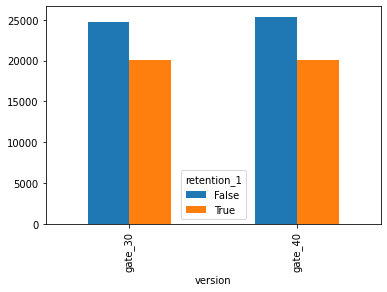

In [28]:
t1.plot(kind='bar')

In [43]:
# muestreo retention_1
control_ret1 = cookies[cookies.version=='gate_30'].sample(n=20034)
tratamiento_ret1= cookies[cookies.version=='gate_40'].sample(n=20034)
ab_test_1=pd.concat([control_ret1, tratamiento_ret1], axis=0)

,userid,version,sum_gamerounds,retention_1,retention_7
53295,5916816,gate_40,113,False,False
37931,4198237,gate_40,4,False,False
46928,5205295,gate_40,0,False,False
73151,8102010,gate_40,6,False,False
7510,832458,gate_40,41,True,True


In [44]:
ab_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40068 entries, 43813 to 7510
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          40068 non-null  int64 
 1   version         40068 non-null  object
 2   sum_gamerounds  40068 non-null  int64 
 3   retention_1     40068 non-null  bool  
 4   retention_7     40068 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 1.3+ MB


In [46]:
ab_test_1.version.value_counts()

gate_30    20034
gate_40    20034
Name: version, dtype: int64

In [59]:
tasas_conversion=ab_test_1.groupby('version')['retention_1'] # agrupo por grupo

std=lambda x: np.std(x, ddof=0)    # std

error_std=lambda x: stats.sem(x, ddof=0)   # error standard , (std/sqrt(n))

tasas_conversion=tasas_conversion.agg([np.mean, std, error_std])
tasas_conversion.columns=['conversion_rate', 'std', 'std_error']


tasas_conversion.style.format('{:.3f}')

C:\Users\Irene Aguerri\AppData\Local\Temp\ipykernel_17232\60245887.py:5: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  error_std=lambda x: stats.sem(x, ddof=0)   # error standard , (std/sqrt(n))


,conversion_rate,std,std_error
version,,,
gate_30,0.449,0.497,0.004
gate_40,0.441,0.496,0.004


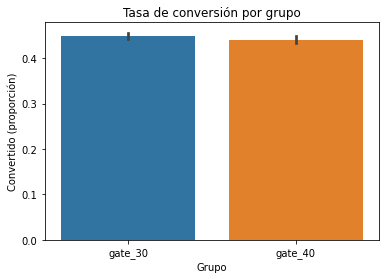

In [62]:
plt.figure(figsize=(6,4))

sns.barplot(x=ab_test_1['version'], 
            y=ab_test_1['retention_1'])

# plt.ylim(0, 0.17)
plt.title('Tasa de conversión por grupo')
plt.xlabel('Grupo')
plt.ylabel('Convertido (proporción)');

La tasa de conversión de 

## AB Test for day 7

In [63]:
t2

retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


In [64]:
#Check if there are unique
#Se puede hacer tb por test 
usuarios=cookies.userid.value_counts(ascending=False)
usuarios[usuarios>1].count()

0

<AxesSubplot:xlabel='version'>

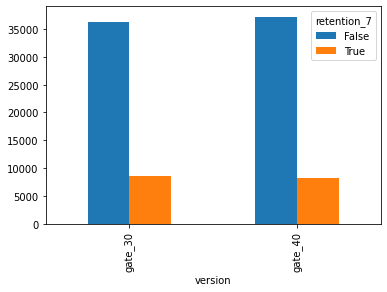

In [65]:
t2.plot(kind='bar')

In [71]:
# muestreo retention_1
control_ret2 = cookies[cookies.version=='gate_30'].sample(n=8279)
tratamiento_ret2= cookies[cookies.version=='gate_40'].sample(n=8279)
ab_test_2=pd.concat([control_ret1, tratamiento_ret1], axis=0)
ab_test_2.tail()

,userid,version,sum_gamerounds,retention_1,retention_7
53295,5916816,gate_40,113,False,False
37931,4198237,gate_40,4,False,False
46928,5205295,gate_40,0,False,False
73151,8102010,gate_40,6,False,False
7510,832458,gate_40,41,True,True


In [72]:
ab_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40068 entries, 43813 to 7510
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          40068 non-null  int64 
 1   version         40068 non-null  object
 2   sum_gamerounds  40068 non-null  int64 
 3   retention_1     40068 non-null  bool  
 4   retention_7     40068 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 1.3+ MB


In [70]:
ab_test_2.version.value_counts()

gate_30    20034
gate_40    20034
Name: version, dtype: int64

In [59]:
tasas_conversion=ab_test_1.groupby('version')['retention_1'] # agrupo por grupo

std=lambda x: np.std(x, ddof=0)    # std

error_std=lambda x: stats.sem(x, ddof=0)   # error standard , (std/sqrt(n))

tasas_conversion=tasas_conversion.agg([np.mean, std, error_std])
tasas_conversion.columns=['conversion_rate', 'std', 'std_error']


tasas_conversion.style.format('{:.3f}')

C:\Users\Irene Aguerri\AppData\Local\Temp\ipykernel_17232\60245887.py:5: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  error_std=lambda x: stats.sem(x, ddof=0)   # error standard , (std/sqrt(n))


,conversion_rate,std,std_error
version,,,
gate_30,0.449,0.497,0.004
gate_40,0.441,0.496,0.004


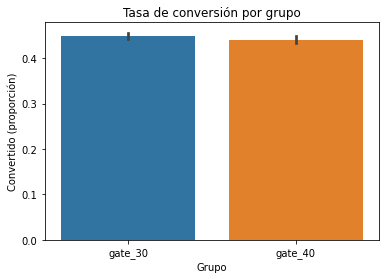

In [62]:
plt.figure(figsize=(6,4))

sns.barplot(x=ab_test_1['version'], 
            y=ab_test_1['retention_1'])

# plt.ylim(0, 0.17)
plt.title('Tasa de conversión por grupo')
plt.xlabel('Grupo')
plt.ylabel('Convertido (proporción)');

La tasa de conversión de 

## AB Test for day 7

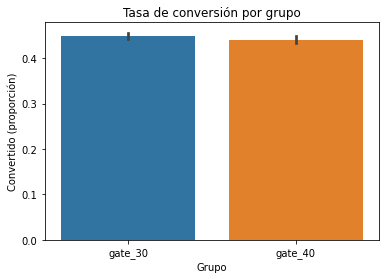

In [62]:
t1

#Check if there are unique
#Se puede hacer tb por test 
usuarios=cookies.userid.value_counts(ascending=False)
usuarios[usuarios>1].count()

t1.plot(kind='bar')

# muestreo retention_1
control_ret1 = cookies[cookies.version=='gate_30'].sample(n=20034)
tratamiento_ret1= cookies[cookies.version=='gate_40'].sample(n=20034)
ab_test_1=pd.concat([control_ret1, tratamiento_ret1], axis=0)

ab_test_1.info()

ab_test_1.version.value_counts()

tasas_conversion=ab_test_1.groupby('version')['retention_1'] # agrupo por grupo

std=lambda x: np.std(x, ddof=0)    # std

error_std=lambda x: stats.sem(x, ddof=0)   # error standard , (std/sqrt(n))

tasas_conversion=tasas_conversion.agg([np.mean, std, error_std])
tasas_conversion.columns=['conversion_rate', 'std', 'std_error']


tasas_conversion.style.format('{:.3f}')

plt.figure(figsize=(6,4))

sns.barplot(x=ab_test_1['version'], 
            y=ab_test_1['retention_1'])

# plt.ylim(0, 0.17)
plt.title('Tasa de conversión por grupo')
plt.xlabel('Grupo')
plt.ylabel('Convertido (proporción)');

La tasa de conversión de 

## AB Test for day 7plt.figure(figsize=(6,4))

sns.barplot(x=ab_test_1['version'], 
            y=ab_test_1['retention_1'])

# plt.ylim(0, 0.17)
plt.title('Tasa de conversión por grupo')
plt.xlabel('Grupo')
plt.ylabel('Convertido (proporción)');

La tasa de conversión de 

In [4]:
# testeo para retention_1


In [5]:
# testeo para retention_7



In [ ]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.